In [5]:
import sys
sys.path.append("/Users/q616967/Workspace/thesis/uni/xai-thesis/")
sys.path.append('/Users/q616967/Library/Python/3.10/lib/python/site-packages')
sys.path.append('..')
import utils.features

import os
import json
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import pprint as pp

In [6]:
PROJECT_DIR = os.path.dirname(os.getcwd())
FEATURES_DIR = os.path.join(PROJECT_DIR, "feature_extraction/featureExtraction/output/")
RESPONSES_DIR = os.path.join(PROJECT_DIR, "responses/")

MODELS_DIR = os.path.join(PROJECT_DIR, "classification/models/")
PREDS_DIR = os.path.join(PROJECT_DIR, "classification/preds/")
STATS_DIR = os.path.join(PROJECT_DIR, "classification/stats/")

PROJECT_DIR

'/mount/studenten-temp1/users/dpgo/xai-thesis'

In [7]:
run_file_map = {
    'all': 'classification/stats/04091703_all_2000.json',
    'col': 'classification/stats/04091703_col_2000.json',
    'col-rfe': 'classification/stats/04091703_col-rfe_2000.json',
    'col-rfe-kbest': 'classification/stats/04091703_col-rfe-kbest_2000.json',
    'all_10000': 'classification/stats/12091031_all_10000.json',
    'col_10000': 'classification/stats/12091031_col_10000.json',
    'col-rfe_10000': 'classification/stats/12091031_col-rfe_10000.json',
    'col-rfe-kbest_10000': 'classification/stats/12091031_col-rfe-kbest_10000.json',
    'col-rfe-int_10000': 'classification/stats/12091031_col-rfe-int_10000.json',
    'col-kbest-rfe_all_10000': 'classification/stats/12091031_col-kbest-rfe_all_10000.json',
    #'col-kbest-rfe_ens_all_1000'
}

In [8]:
def visualize_results(stats_file, n_features=10):
    
    # load file with results
    with open(os.path.join(PROJECT_DIR, stats_file), "r") as f:
        stats = json.load(f)
        coef_dict, scores_dict = stats['coefficients'], stats['scores']

    # metrics
    # round floats in scores_dict to 2 decimals
    for key, value in scores_dict.items():
        if isinstance(value, float):
            scores_dict[key] = round(value, 2)
        elif isinstance(value, dict):
            for inner_key, inner_value in value.items():
                if isinstance(inner_value, float):
                    scores_dict[key][inner_key] = round(inner_value, 2)
                if inner_key == 'support':
                    scores_dict[key][inner_key] = int(inner_value)
    
    pp.pprint(scores_dict, indent=4)
    
    # feature importances
    coef_df = pd.DataFrame(coef_dict.items(), columns=['feature', 'coefficient'])
    coef_df = coef_df.sort_values(by='coefficient', ascending=False)

    top_n_pos_features = coef_df.head(n_features)
    top_n_neg_features = coef_df.tail(n_features)
    top_features_df = pd.merge(top_n_pos_features, top_n_neg_features, how='outer')

    top_features_df.plot(x='feature', y='coefficient', kind='barh', figsize=(20, 10))

    return top_features_df

# 2000

## All features

{   'False': {   'f1-score': 0.48,
                 'precision': 0.54,
                 'recall': 0.43,
                 'support': 164},
    'True': {   'f1-score': 0.7,
                'precision': 0.65,
                'recall': 0.75,
                'support': 236},
    'accuracy': 0.61,
    'macro avg': {   'f1-score': 0.59,
                     'precision': 0.6,
                     'recall': 0.59,
                     'support': 400},
    'weighted avg': {   'f1-score': 0.61,
                        'precision': 0.61,
                        'recall': 0.61,
                        'support': 400}}


,feature,coefficient
0,ADP,1.210790
1,hu_liu_neg_perc_nouns_neg_3,1.008161
2,first_person,0.992509
3,Powcoop_Lasswell_adverbs,0.945784
4,Enlgain_Lasswell_nouns,0.944660
5,Bldgpt_GI_adjectives,0.943766
6,Joy_EmoLex_adjectives_neg_3,0.939089
7,Ovrst_GI_adjectives_neg_3,0.922430
8,Know_GI_adverbs_neg_3,0.833886
9,Space_GI_neg_3,0.814363


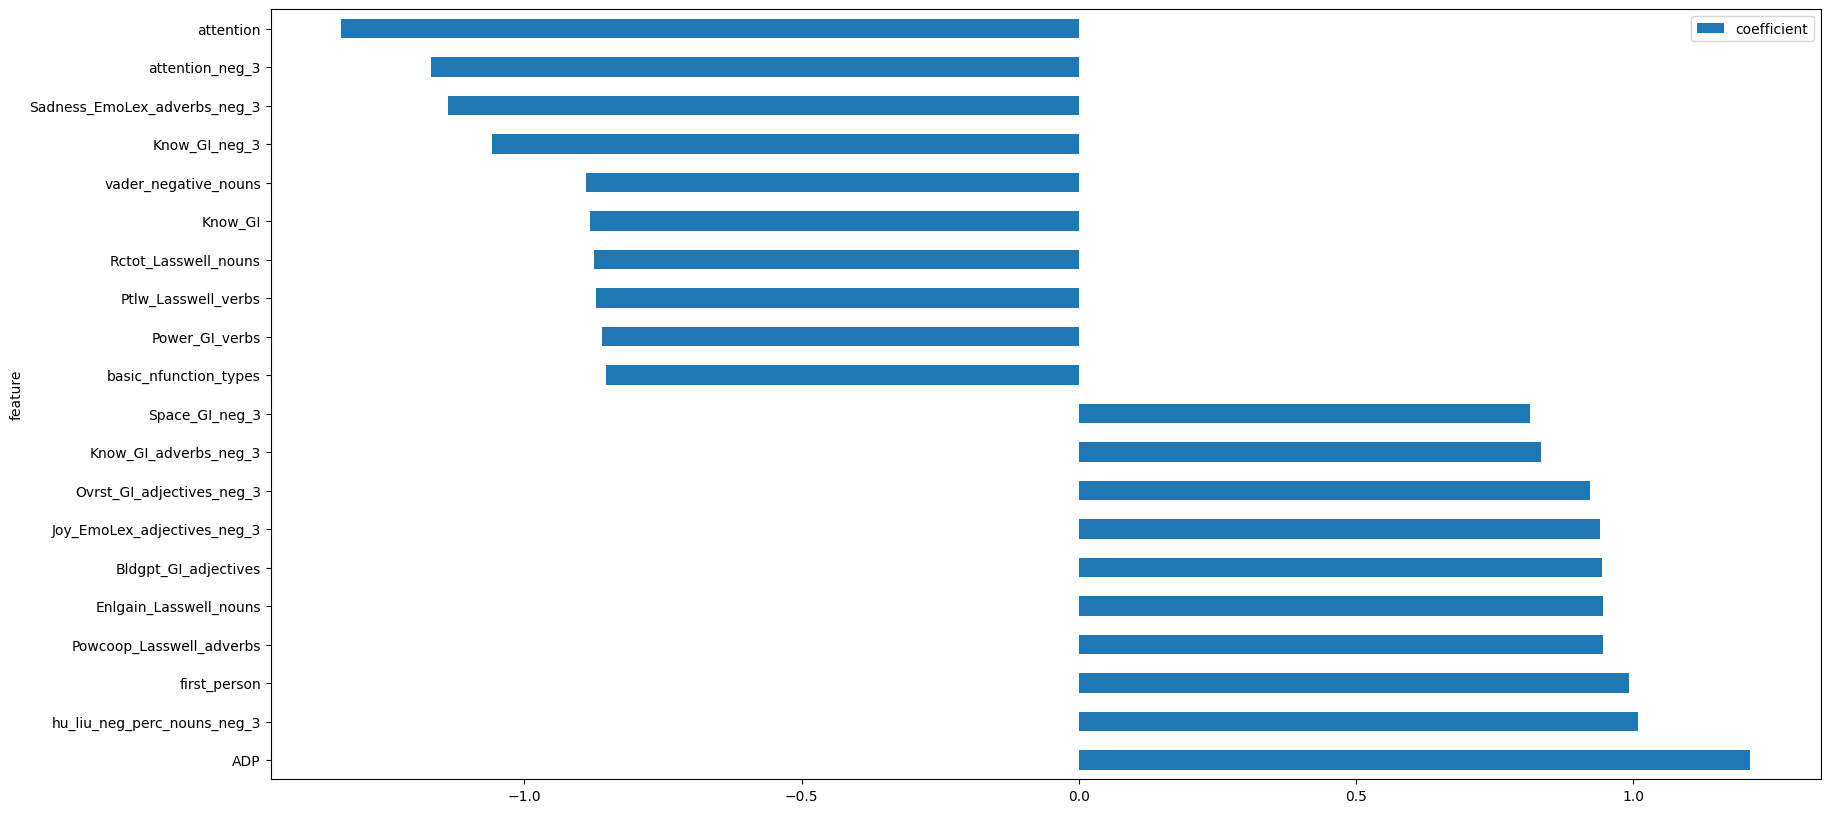

In [9]:
visualize_results(run_file_map['all'], n_features=10)

## No collinear features

{   'False': {   'f1-score': 0.52,
                 'precision': 0.61,
                 'recall': 0.45,
                 'support': 164},
    'True': {   'f1-score': 0.73,
                'precision': 0.68,
                'recall': 0.8,
                'support': 236},
    'accuracy': 0.66,
    'macro avg': {   'f1-score': 0.63,
                     'precision': 0.64,
                     'recall': 0.63,
                     'support': 400},
    'weighted avg': {   'f1-score': 0.65,
                        'precision': 0.65,
                        'recall': 0.66,
                        'support': 400}}


,feature,coefficient
0,Enlgain_Lasswell_nouns,1.376447
1,Dominance_nouns_neg_3,1.303025
2,Dominance_nwords_neg_3,1.170541
3,Powcoop_Lasswell_adverbs,1.086688
4,Beingtouched_GALC_verbs_neg_3,1.079550
5,first_person,1.074222
6,ADP,1.048098
7,ttr,1.046261
8,Bldgpt_GI_adjectives,1.039291
9,Try_GI_nouns_neg_3,1.012750


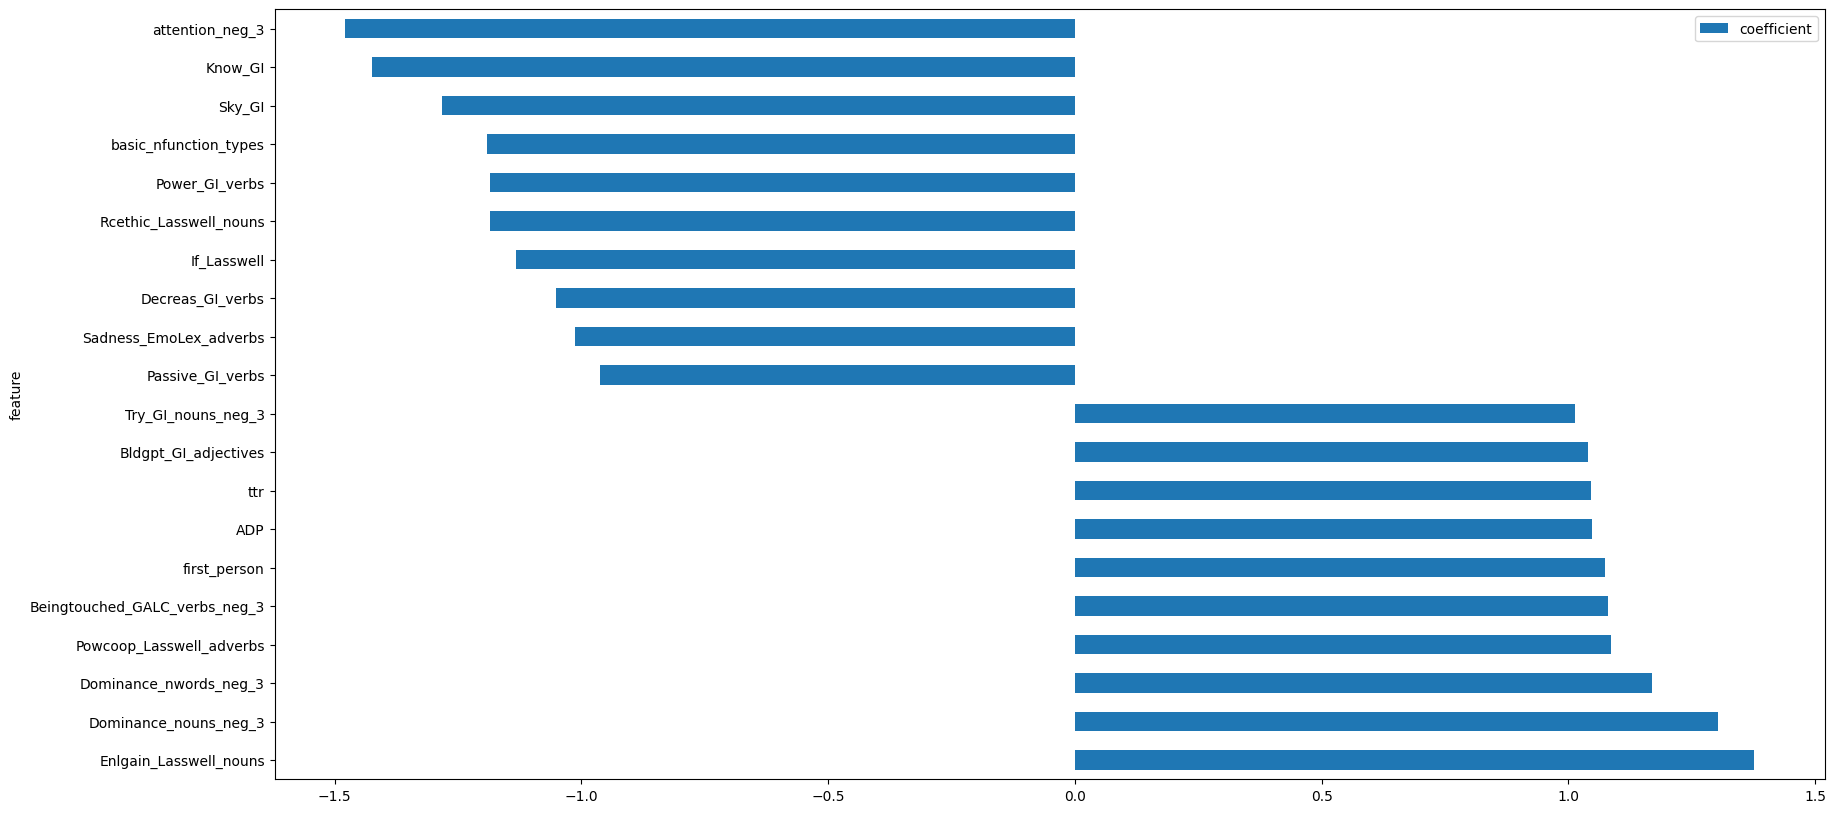

In [10]:
visualize_results(run_file_map['col'], n_features=10)

## No collinear features + Recursive Feature Elimination (RFE)

{   'False': {   'f1-score': 0.62,
                 'precision': 0.72,
                 'recall': 0.54,
                 'support': 164},
    'True': {   'f1-score': 0.79,
                'precision': 0.73,
                'recall': 0.86,
                'support': 236},
    'accuracy': 0.73,
    'macro avg': {   'f1-score': 0.7,
                     'precision': 0.73,
                     'recall': 0.7,
                     'support': 400},
    'weighted avg': {   'f1-score': 0.72,
                        'precision': 0.73,
                        'recall': 0.73,
                        'support': 400}}


,feature,coefficient
0,Dominance_nwords_neg_3,1.386176
1,Enlgain_Lasswell_nouns,1.377845
2,Dominance_nouns_neg_3,1.366039
3,Virtue_GI_adverbs_neg_3,1.206545
4,Powcoop_Lasswell_adverbs,1.131896
5,ADP,1.127027
6,first_person,1.118939
7,Powpt_Lasswell_verbs,1.087760
8,fear_and_digust_component,1.055802
9,Bldgpt_GI_adjectives,1.033998


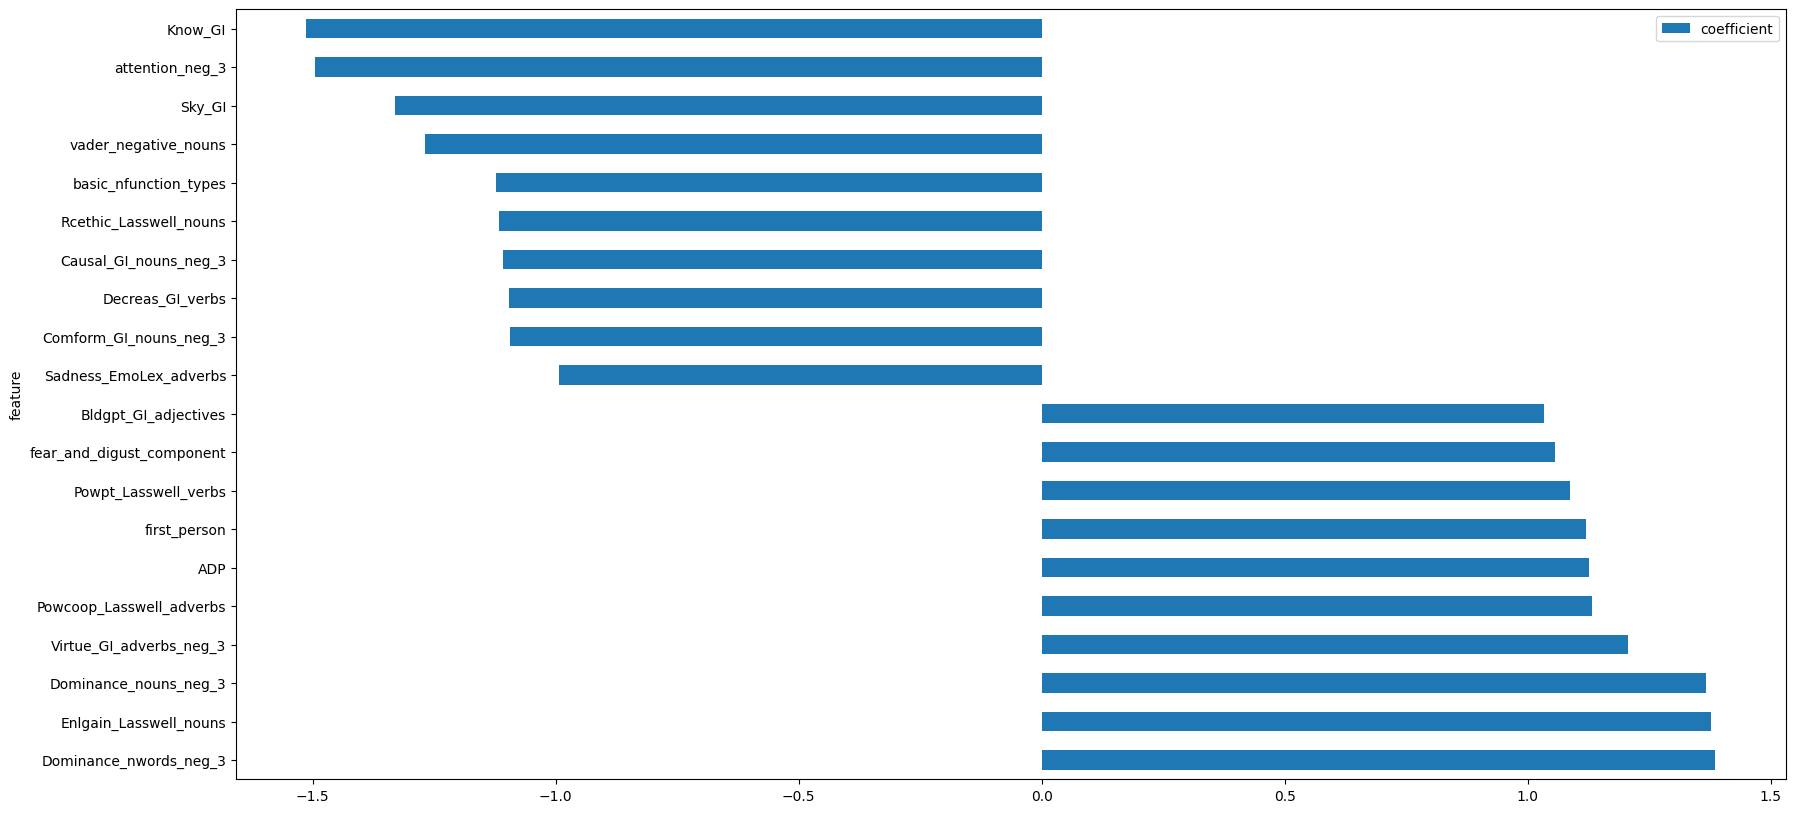

In [11]:
visualize_results(run_file_map['col-rfe'], n_features=10)

## No collinear features + RFE + SelectKBest

{   'False': {   'f1-score': 0.55,
                 'precision': 0.66,
                 'recall': 0.47,
                 'support': 164},
    'True': {   'f1-score': 0.76,
                'precision': 0.69,
                'recall': 0.83,
                'support': 236},
    'accuracy': 0.68,
    'macro avg': {   'f1-score': 0.65,
                     'precision': 0.68,
                     'recall': 0.65,
                     'support': 400},
    'weighted avg': {   'f1-score': 0.67,
                        'precision': 0.68,
                        'recall': 0.68,
                        'support': 400}}


,feature,coefficient
0,Enlgain_Lasswell_nouns,1.790470
1,Dominance_nouns_neg_3,1.512650
2,Dominance_nwords_neg_3,1.180027
3,Powcoop_Lasswell_adverbs,1.121405
4,lexical_density_tokens,1.090500
5,Beingtouched_GALC_neg_3,1.088343
6,Sv_GI_adverbs,1.017949
7,Passive_GI_nouns,0.949493
8,hu_liu_neg_nwords_nouns_neg_3,0.936531
9,Eval_GI_adverbs,0.930550


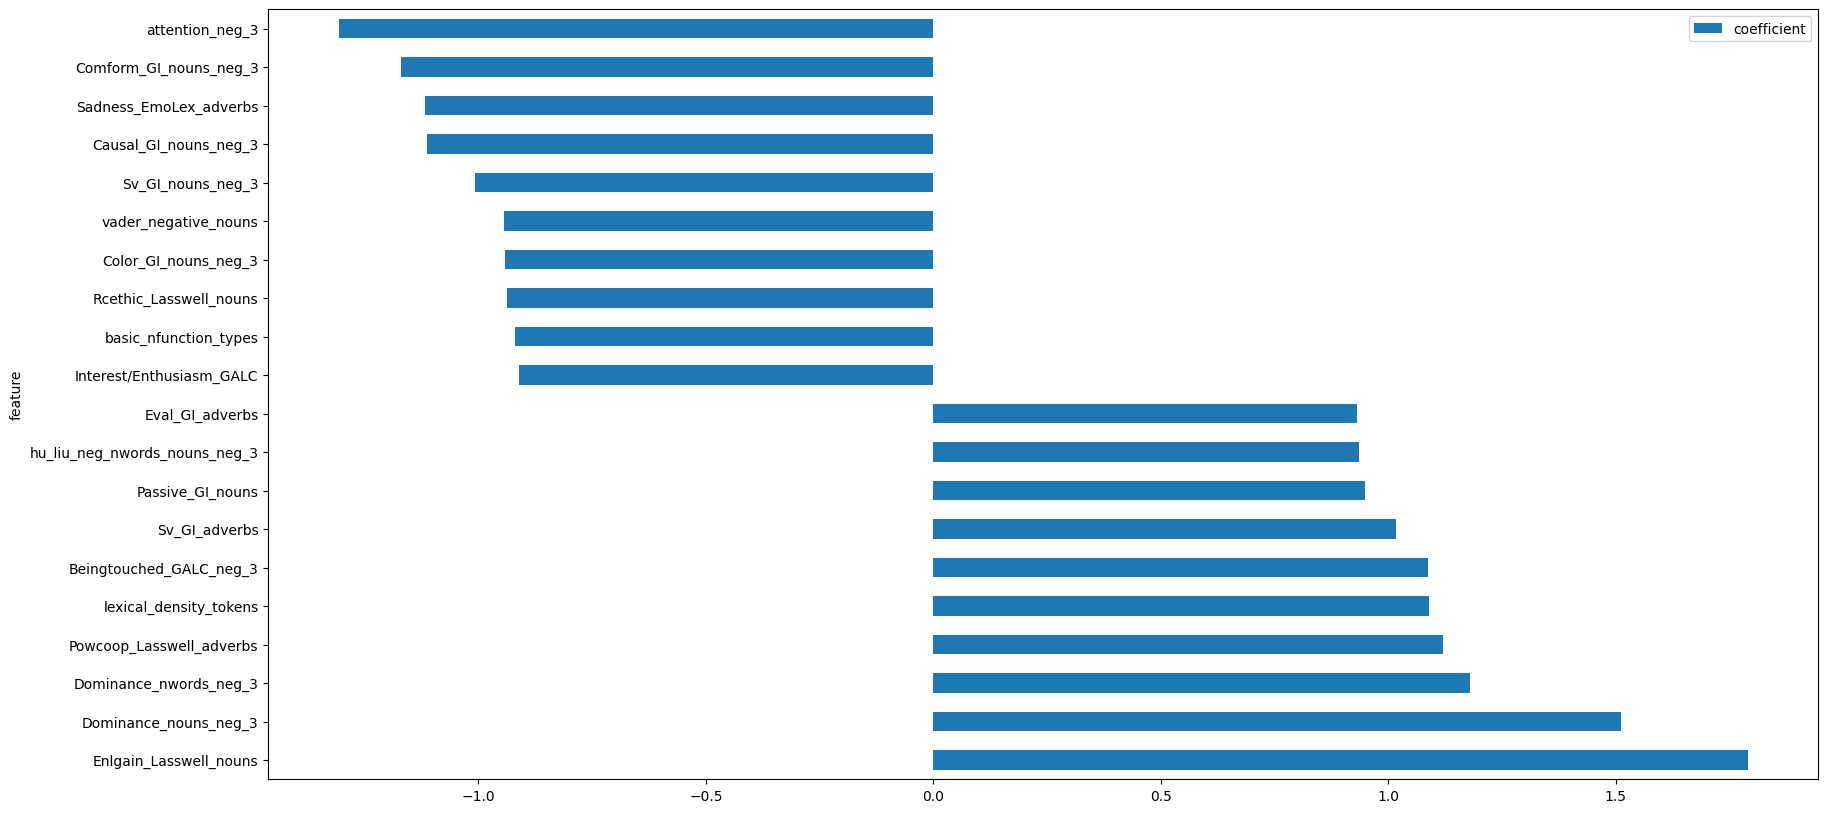

In [12]:
visualize_results(run_file_map['col-rfe-kbest'], n_features=10)

# 10.000

## All features

{   'False': {   'f1-score': 0.53,
                 'precision': 0.58,
                 'recall': 0.48,
                 'support': 767},
    'True': {   'f1-score': 0.74,
                'precision': 0.71,
                'recall': 0.78,
                'support': 1233},
    'accuracy': 0.67,
    'macro avg': {   'f1-score': 0.64,
                     'precision': 0.64,
                     'recall': 0.63,
                     'support': 2000},
    'weighted avg': {   'f1-score': 0.66,
                        'precision': 0.66,
                        'recall': 0.67,
                        'support': 2000}}


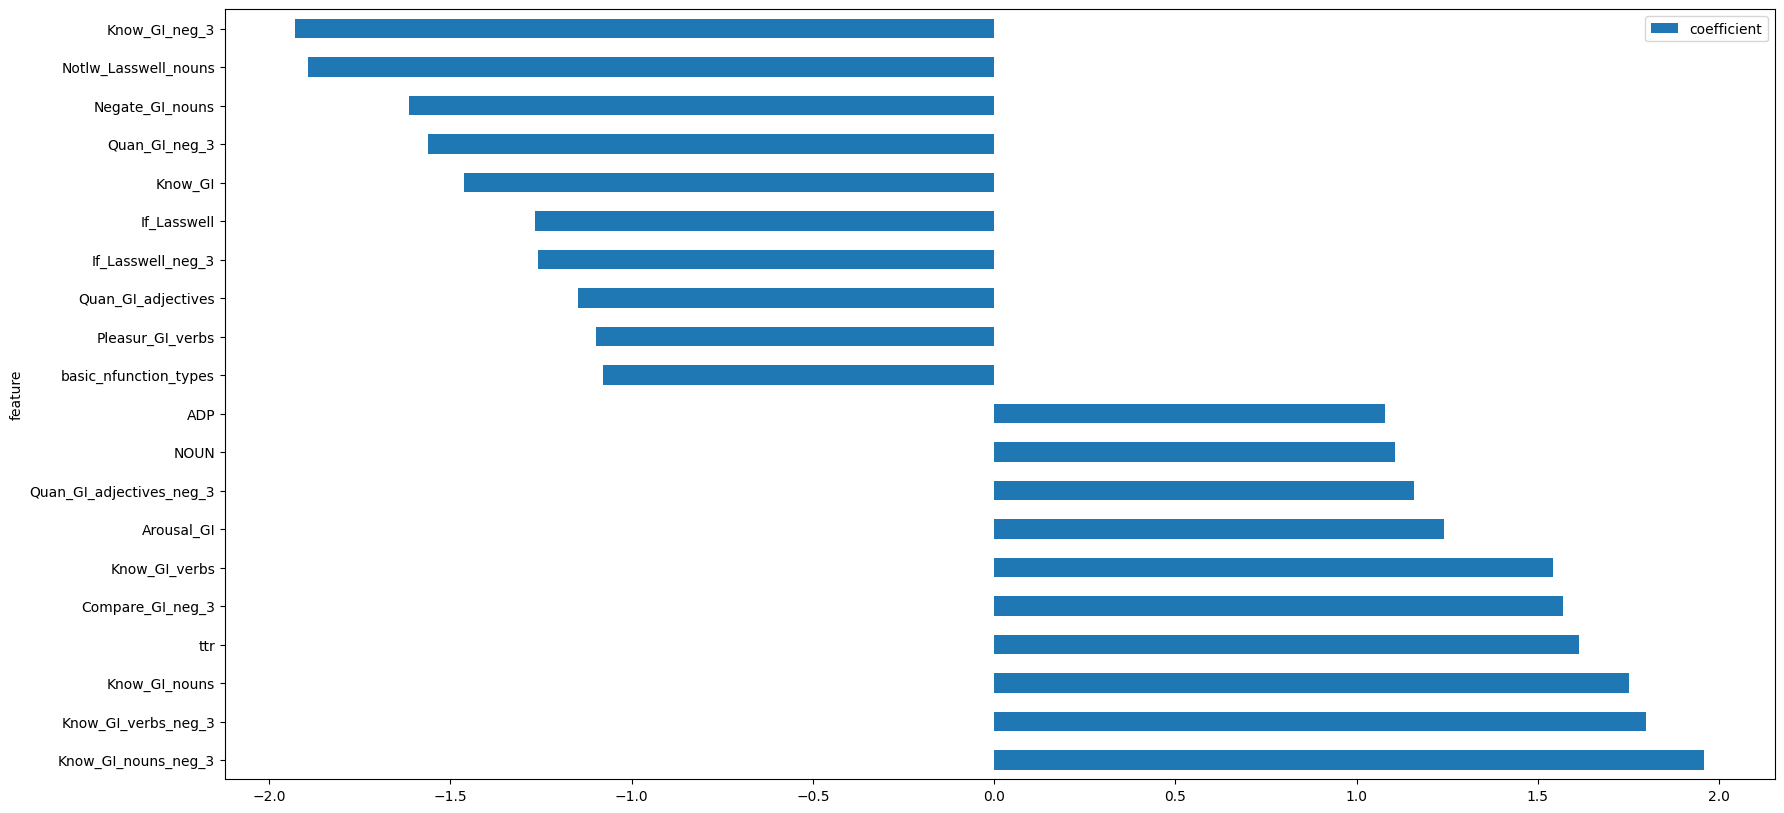

In [13]:
top_df_all_10000 = visualize_results(run_file_map['all_10000'], n_features=10)

## No collinear features

{   'False': {   'f1-score': 0.53,
                 'precision': 0.59,
                 'recall': 0.48,
                 'support': 767},
    'True': {   'f1-score': 0.75,
                'precision': 0.71,
                'recall': 0.79,
                'support': 1233},
    'accuracy': 0.67,
    'macro avg': {   'f1-score': 0.64,
                     'precision': 0.65,
                     'recall': 0.64,
                     'support': 2000},
    'weighted avg': {   'f1-score': 0.66,
                        'precision': 0.66,
                        'recall': 0.67,
                        'support': 2000}}


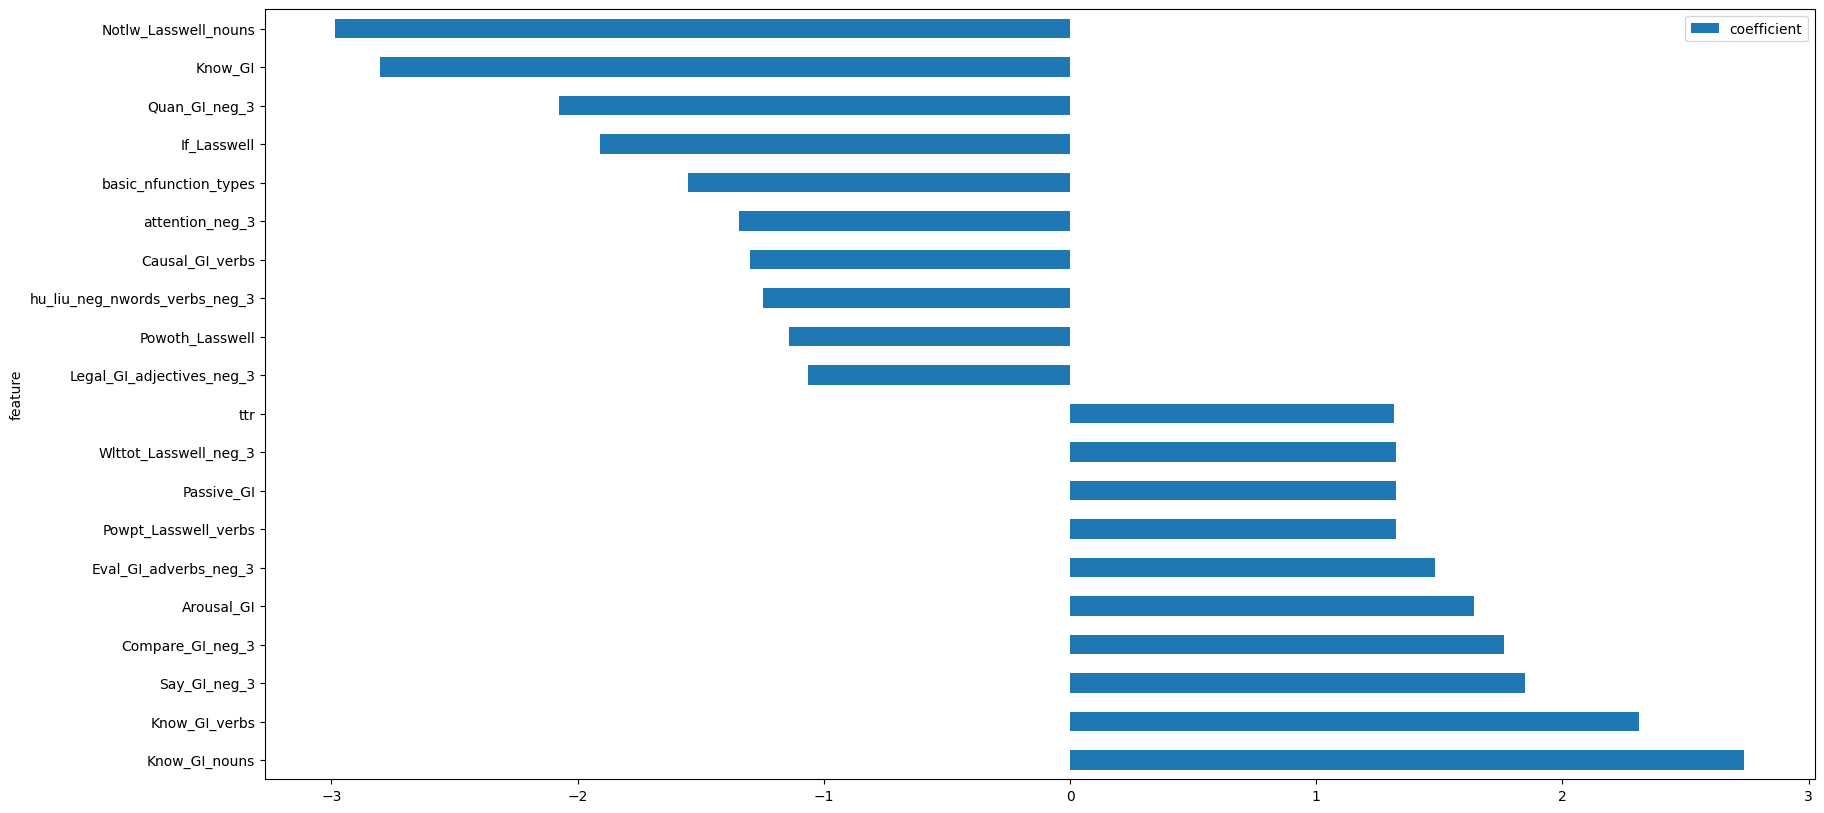

In [14]:
top_df_col_10000 = visualize_results(run_file_map['col_10000'], n_features=10)

## No collinear features + Recursive Feature Elimination (RFE)

{   'False': {   'f1-score': 0.57,
                 'precision': 0.65,
                 'recall': 0.5,
                 'support': 767},
    'True': {   'f1-score': 0.78,
                'precision': 0.73,
                'recall': 0.83,
                'support': 1233},
    'accuracy': 0.7,
    'macro avg': {   'f1-score': 0.67,
                     'precision': 0.69,
                     'recall': 0.67,
                     'support': 2000},
    'weighted avg': {   'f1-score': 0.7,
                        'precision': 0.7,
                        'recall': 0.7,
                        'support': 2000}}


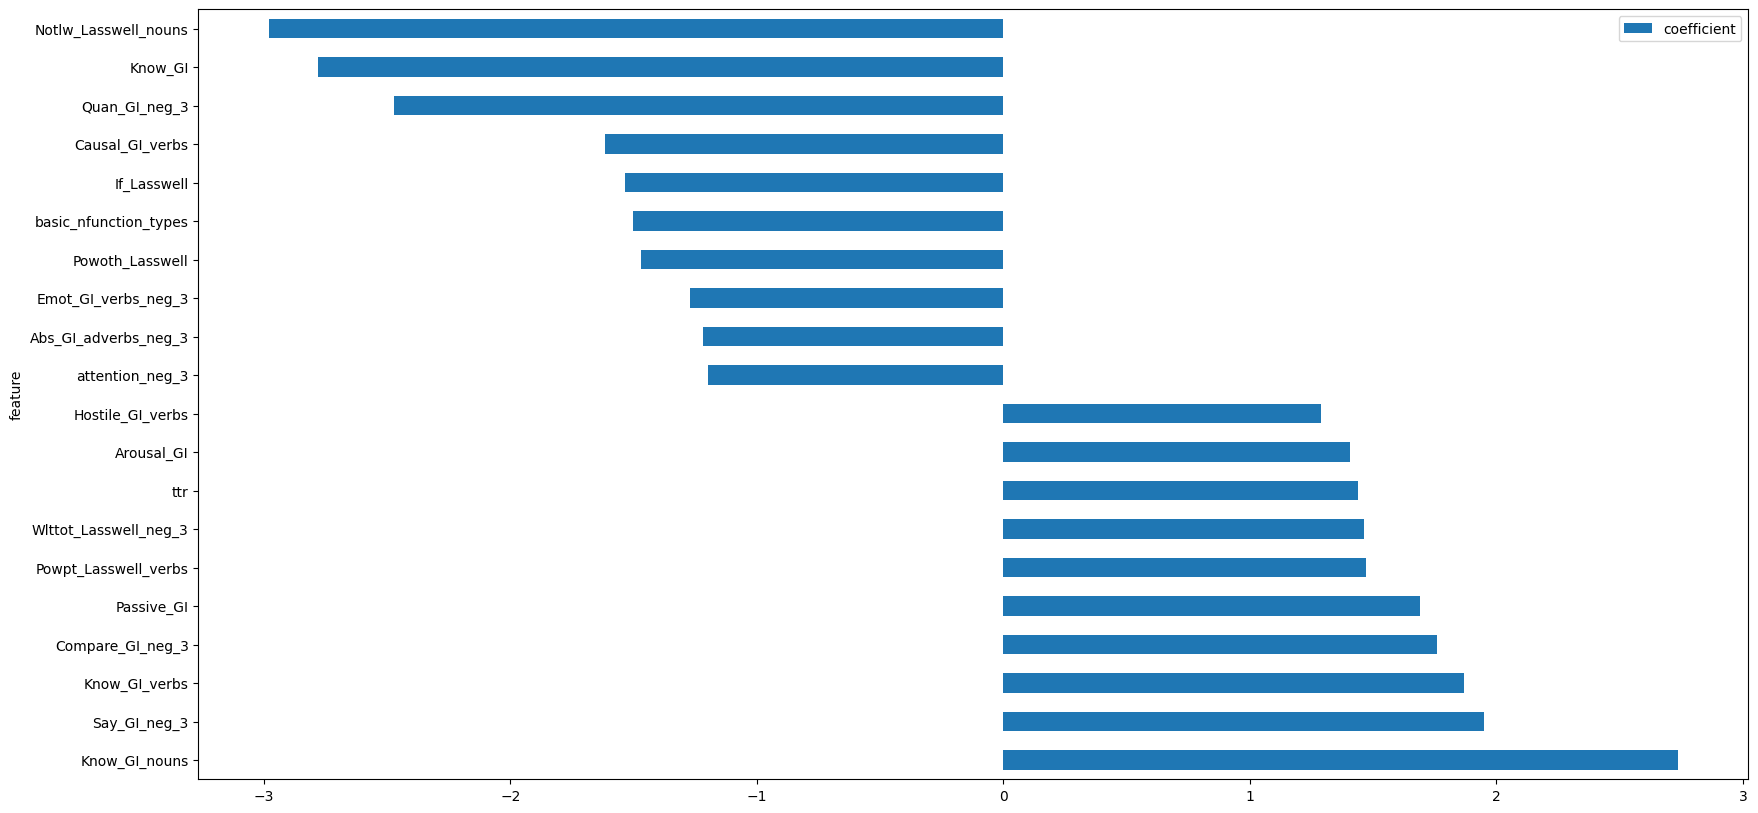

In [15]:
top_df_colrfe_10000 = visualize_results(run_file_map['col-rfe_10000'], n_features=10)

In [16]:
top_df_colrfe_10000

,feature,coefficient
0,Know_GI_nouns,2.736815
1,Say_GI_neg_3,1.949754
2,Know_GI_verbs,1.867992
3,Compare_GI_neg_3,1.758472
4,Passive_GI,1.692020
5,Powpt_Lasswell_verbs,1.472481
6,Wlttot_Lasswell_neg_3,1.461983
7,ttr,1.437773
8,Arousal_GI,1.407393
9,Hostile_GI_verbs,1.289528


## No collinear features + RFE + interactions

{   'False': {   'f1-score': 0.56,
                 'precision': 0.65,
                 'recall': 0.5,
                 'support': 767},
    'True': {   'f1-score': 0.78,
                'precision': 0.73,
                'recall': 0.83,
                'support': 1233},
    'accuracy': 0.7,
    'macro avg': {   'f1-score': 0.67,
                     'precision': 0.69,
                     'recall': 0.67,
                     'support': 2000},
    'weighted avg': {   'f1-score': 0.69,
                        'precision': 0.7,
                        'recall': 0.7,
                        'support': 2000}}


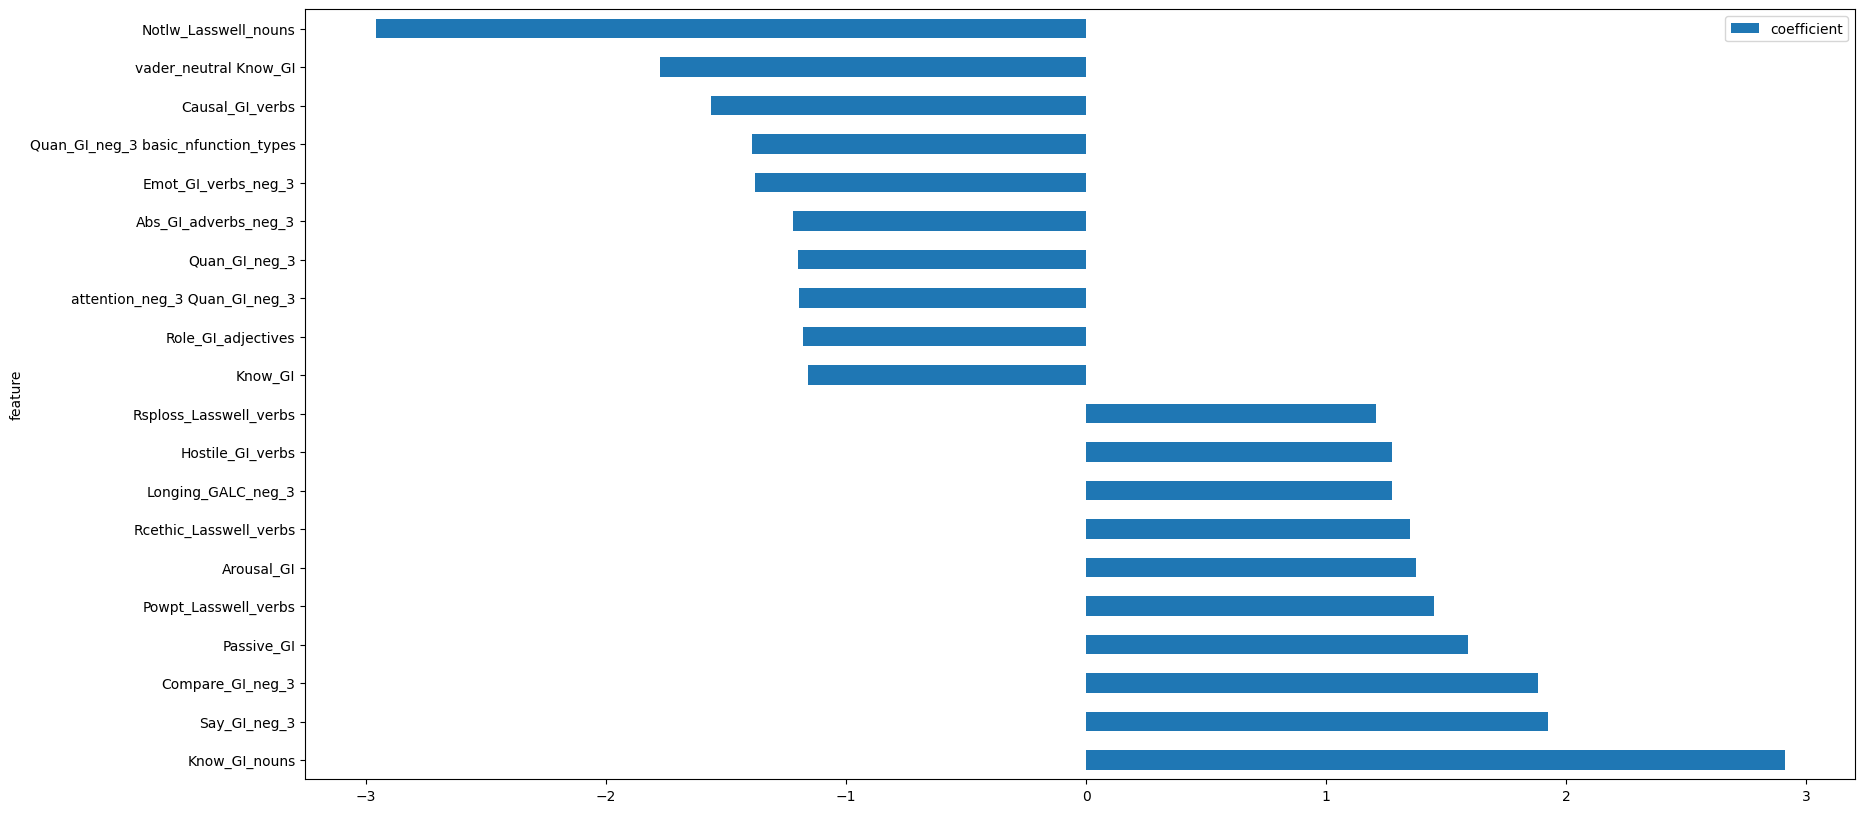

In [17]:
top_df_colrfeint_10000 = visualize_results(run_file_map['col-rfe-int_10000'], n_features=10)

In [18]:
top_df_colrfeint_10000

,feature,coefficient
0,Know_GI_nouns,2.909267
1,Say_GI_neg_3,1.923601
2,Compare_GI_neg_3,1.881599
3,Passive_GI,1.589852
4,Powpt_Lasswell_verbs,1.447598
5,Arousal_GI,1.373254
6,Rcethic_Lasswell_verbs,1.348072
7,Longing_GALC_neg_3,1.272836
8,Hostile_GI_verbs,1.272064
9,Rsploss_Lasswell_verbs,1.206685


## No collinear features + RFE + SelectKBest

{   'False': {   'f1-score': 0.5,
                 'precision': 0.61,
                 'recall': 0.42,
                 'support': 767},
    'True': {   'f1-score': 0.76,
                'precision': 0.7,
                'recall': 0.83,
                'support': 1233},
    'accuracy': 0.68,
    'macro avg': {   'f1-score': 0.63,
                     'precision': 0.65,
                     'recall': 0.63,
                     'support': 2000},
    'weighted avg': {   'f1-score': 0.66,
                        'precision': 0.66,
                        'recall': 0.68,
                        'support': 2000}}


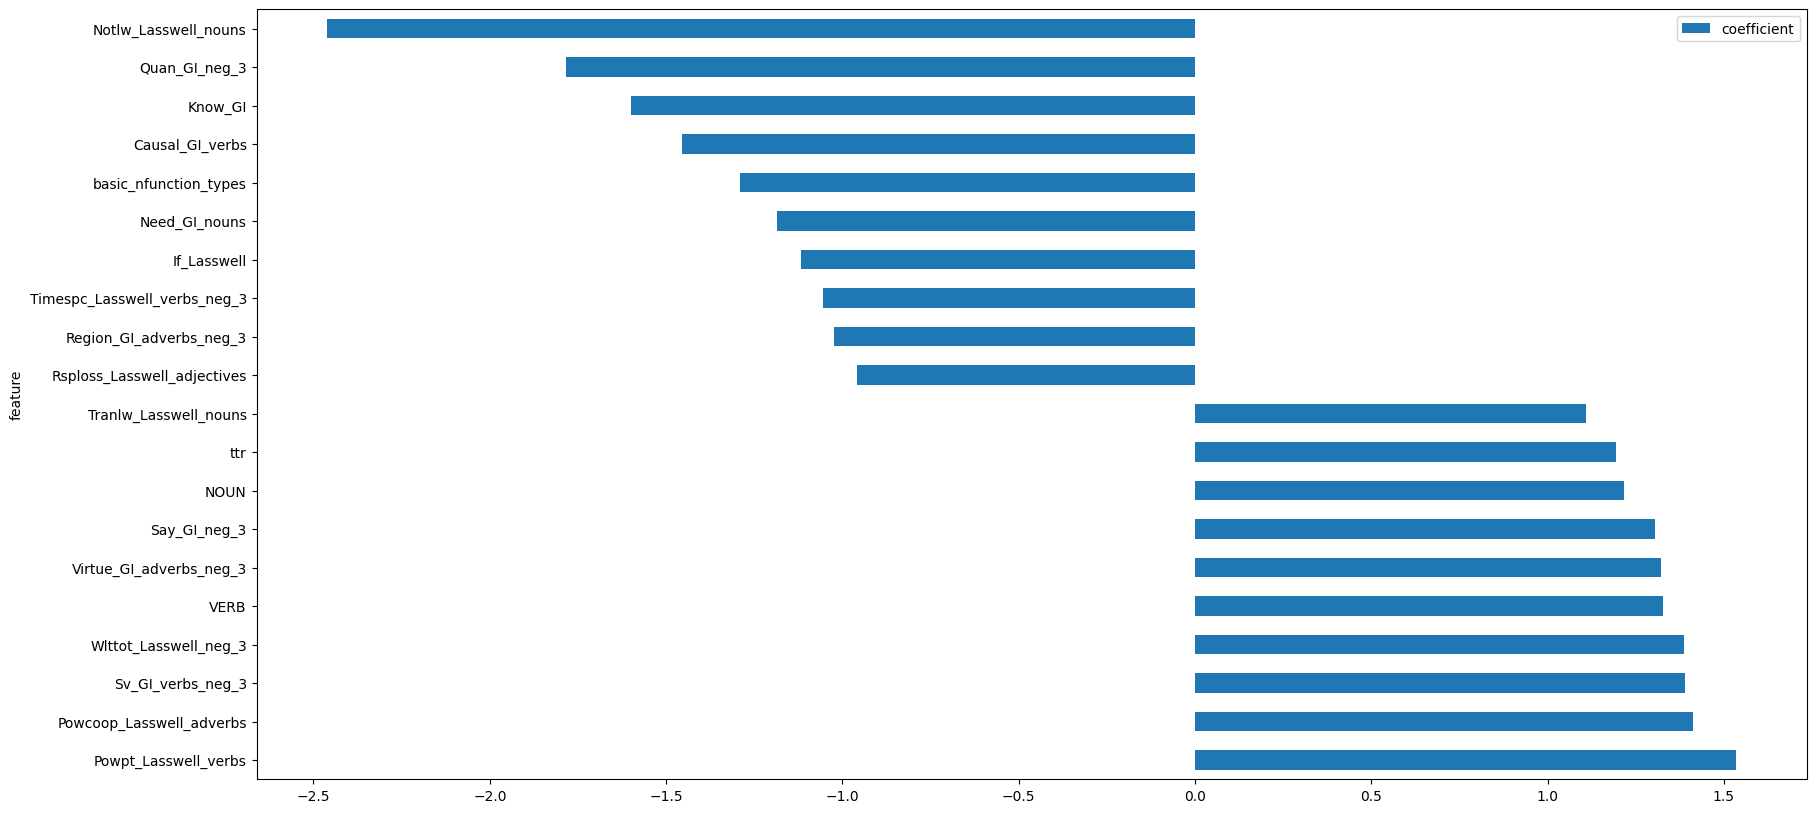

In [19]:
top_df_colrfekbest = visualize_results(run_file_map['col-rfe-kbest_10000'], n_features=10)

{   'False': {   'f1-score': 0.56,
                 'precision': 0.65,
                 'recall': 0.49,
                 'support': 767},
    'True': {   'f1-score': 0.78,
                'precision': 0.72,
                'recall': 0.84,
                'support': 1233},
    'accuracy': 0.7,
    'macro avg': {   'f1-score': 0.67,
                     'precision': 0.69,
                     'recall': 0.66,
                     'support': 2000},
    'weighted avg': {   'f1-score': 0.69,
                        'precision': 0.7,
                        'recall': 0.7,
                        'support': 2000}}


,feature,coefficient
0,Know_GI_nouns,2.684617
1,Know_GI_verbs,2.146354
2,Compare_GI_neg_3,2.077924
3,Yes_GI,1.791971
4,Powcoop_Lasswell_adverbs,1.603047
5,Powpt_Lasswell_verbs,1.588544
6,Pstv_GI,1.528333
7,ttr,1.446140
8,Longing_GALC_neg_3,1.404224
9,Arousal_GI,1.368646


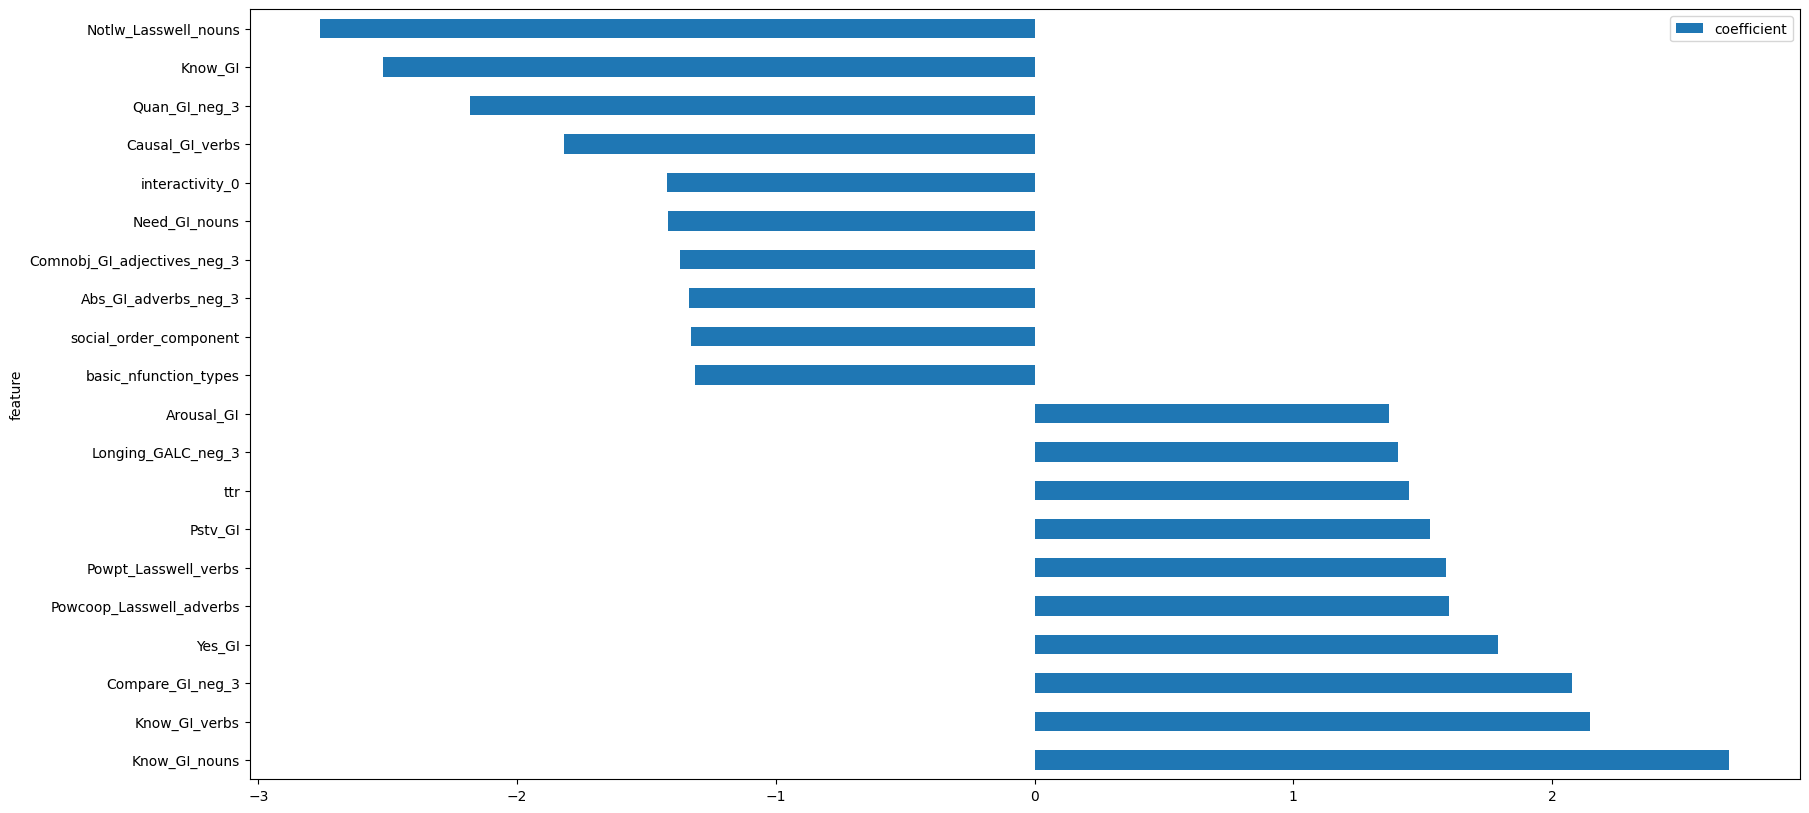

In [20]:
visualize_results(run_file_map['col-kbest-rfe_all_10000'], n_features=10)

# Features interpretation

Negative:

- Notlw_Lasswell_nouns: 25 words that show the denial of one sort or another.
- Know_GI: 348 words indicating awareness or unawareness, certainty or uncertainty, similarity or difference, generality or specificity, importance or unimportance, presence or absence, as well as components of mental classes, concepts or ideas

Positive:
- Know_GI_nouns (and verbs)
- Powtp_Lasswell_verbs: Power ordinary participants: 81 words for non-authoritative actors (such as followers) in the power process. 

From SEANCE (sentiment analysis feature extraction tool) guide:

"**General inquirer.** SEANCE includes the Harvard IV-4 dictionary lists used by The General Inquirer (GI; Stone et al., 1966). The GI lists are the oldest manually constructed lists still in widespread use and include 119 word lists organized into 17 semantic categories containing over 11,000 words. These categories include semantic dimensions, pleasure, overstatements, institutions, roles, social categories, references to places, references to objects, communication, motivation, cognition, pronouns, assent and negation, and verb and adjective types. The lists were developed for content analysis by social, political, and psychological scientists. Greater detail on the categories and available word lists is available at http://www.wjh.harvard.edu/~inquirer/homecat.htm.. "



"**Lasswell.** SEANCE also includes the Lasswell dictionary lists (Lassell & Namewirth, 1969; Namenwirth & Weber, 1987), which are included in the GI. Included are 63 word lists organized into 9 semantic categories. These categories include power, rectitude, respect, affection, wealth, well-being, enlightenment, and skill. Additional information on these categories and their supporting word lists is available at http://www.wjh.harvard.edu/~inquirer/homecat.htm. "